### Mount your Google Drive into this instance of Colab
If you have not already done so, install Google Drive for Desktop on your machine and create a folder in your Google Drive called "Github". Then run the cell below. Then use GitHub Desktop or other approach to clone the class repository into that folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd MyDrive/Github/


### After mounting Google Drive (and cloning the repository if needed), cd to your Github folder on Google Drive

In [ ]:
%cd 'soil-physics-theory'


/content/drive/MyDrive/Github/soil-physics-theory


In [ ]:
%cd 'content/chapter-4'

/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-4


### Install required modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PSP_heat import *
from PSP_thermalCond import *
from PSP_soil import *
from math import *

### 4.1 At what temperature is the thermal conductivity of wet soil independent of water content?

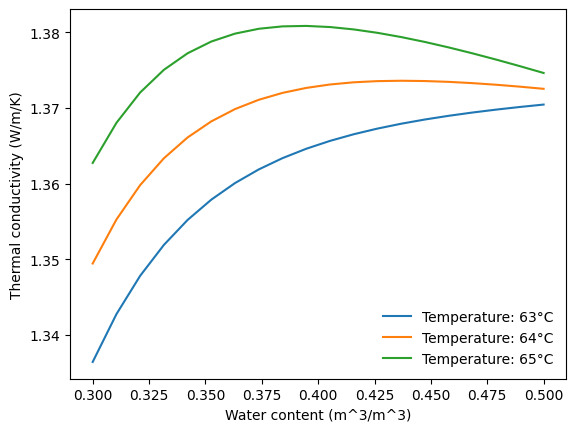

In [ ]:
# Define parameters
bulkDensity = 1300  # kg/m^3
clay = 0.40  # clay content of soil (g/g)
waterContents = np.linspace(0.3, 0.5, 20)  # Vary water content from 30% to 50%
temperatures = range(63, 66, 1)  # Temperature range from 63°C to 66°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water content (m^3/m^3)')
plt.ylabel('Thermal conductivity (W/m/K)')
plt.legend(fontsize='8')
plt.legend(frameon=False)
plt.grid(False)
plt.show()

At 64$^{\circ}$C, the thermal conductivity of a soil with a bulk density of 1300 kg m$^{-3}$ and clay content of 40% is approximately independent of soil water contents between 0.35 and 0.50 m$^3$ m$^{-3}$. This occurs because at this temperature the thermal conductivity of the gas phase is approximately equal to that of the liquid phase.

### 4.2 What is the possible range of volumetric specific heat in mineral soils?

The minimum value will occur when bulk density and soil water content are at their minimum values, which for mineral soils could be a bulk density of 950 kg m$^{-3}$ and soil water content of 0.00 m$^3$ m$^{-3}$.

In [ ]:
bulkDensity = 950 # kg m^-3
waterContent = 0.00 # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The minimum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The minimum heat capacity is approximately 0.860 MJ/m^3/K.


The maximum value will occur when bulk density is minimum and soil water content is maximum, which for mineral soils could be a bulk density of 950 kg m$^{-3}$ and soil water content equal to the porosity.

In [ ]:
bulkDensity = 950 # kg m^-3
porosity = 1 - bulkDensity/2650 # m^3 m^-3
waterContent = porosity # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The maximum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The maximum heat capacity is approximately 3.542 MJ/m^3/K.


### 4.3a What effect would a surface residue mulch have on soil temperature?

Soil temperatures for a bare soil surface without surface residue mulch. Calculations were performed using the finite difference solver with a soil water content of 0.20, a mean temperature of 15$^o$C, an amplitude of 10$^o$C at the soil surface, and a weighting factor of 0.6 for time discretization, simulating for 48 hours.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
water content (m^3/m^3): 0.2
mean temperature [C]: 15
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


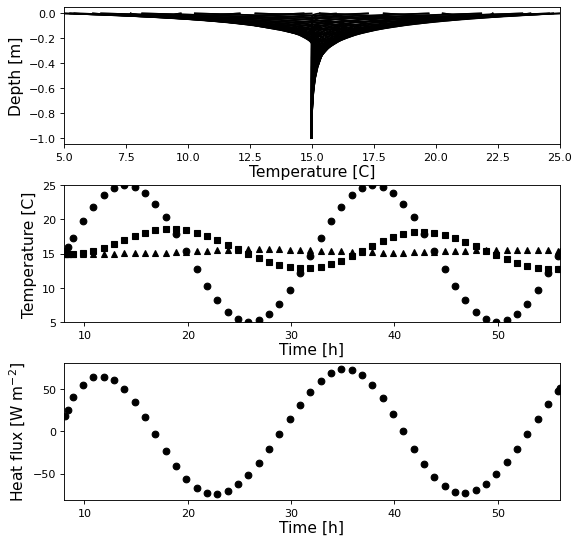

<Figure size 640x480 with 0 Axes>

In [ ]:
run main2.py


Soil temperatures for a soil surface covered with surface residue mulch. Calculations were performed using the finite difference solver with a soil water content of 0.20, a mean temperature of 15$^o$C, an amplitude of 5$^o$C at the soil surface, and a weighting factor of 0.6 for time discretization, simulating for 48 hours.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): 0.2
[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2]
22
mean temperature [C]: 15
amplitude of change in temperature [C]: 5
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


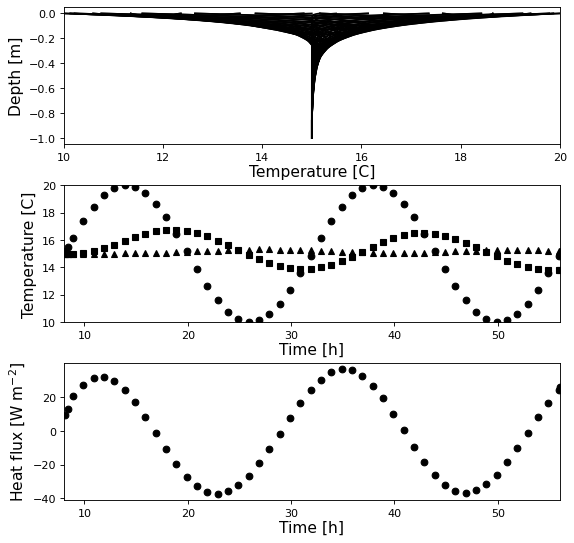

<Figure size 640x480 with 0 Axes>

In [ ]:
run main2.py

### The presence of the surface residue mulch would reduce the amplitude of the soil temperature wave and also reduce the soil heat flux.

### 4.3b At what depth are temperature changes 180 degrees out of phase with the surface temperature?

The figure above shows that at the 0.3 m depth (triangles), the soil temperature is approximately 180 degrees out of phase with the surface temperature.

### 4.4a Modify the program PSP_heat.py so that it allows water content to change with depth. Then compare simulations for a uniform, dry soil with simulations of a moist soil with a dry dust mulch on the surface.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?2
surface water content (m^3/m^3): 0.05
sub-surface water content (m^3/m^3): 0.20
[0.05 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2 ]
22
mean temperature [C]: 15
amplitude of change in temperature [C]: 5
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


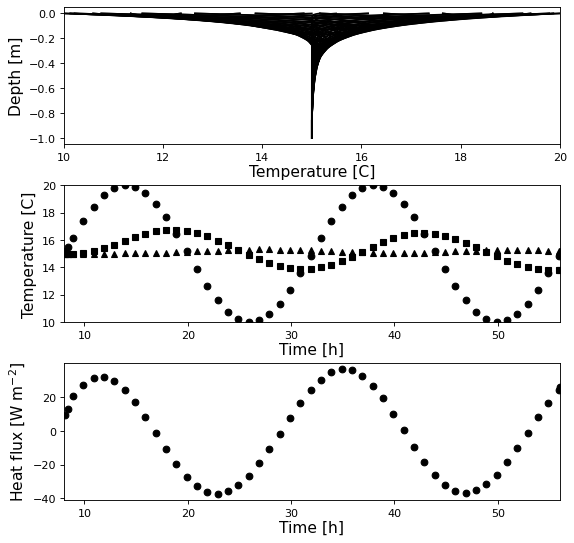

<Figure size 640x480 with 0 Axes>

In [ ]:
run main2.py

### When you are finished coding, commit and push your changes to the remote repository using GitHub Desktop or other approach.